In [387]:
#@title
# recap data types in python: boolean, numeric, string
a = 123      # a is a variable of numeric type
b = '123'    # b is a variable of string type
c = True     # c is a variable of boolean type
print(type(a))
print(type(b))
print(type(c))

<class 'int'>
<class 'str'>
<class 'bool'>


In [388]:
cc = False

In [389]:
#@title
print(a * 3)

369


In [390]:
#@title
d = b * 3
print(d)
print(type(d))

123123123
<class 'str'>


In [391]:
#@title
# make the pandas available
import pandas as pd
# url to the life expectancy data csv file
life_expectancy_url = 'https://drive.google.com/uc?export=download&id=1lfeD_Y4F-pMarx-M_pJM9W6aCe6pSPnr'
# read the csv file into a "DataFrame", a core object in pandas library
df = pd.read_csv(life_expectancy_url, header=2, skip_blank_lines=True, sep=',', quotechar='"')


In [392]:
#@title
# take a quick look at the first 10 rows
# head(n=5)
df.head(n=10)
# df.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,NaN,NaN,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,NaN,NaN,NaN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,NaN,NaN,NaN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,...,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000,NaN,NaN,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,...,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526,NaN,NaN,NaN
6,United Arab Emirates,ARE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,51.537000,52.560000,53.573000,54.572000,55.555000,56.523000,...,76.521000,76.711000,76.903000,77.095000,77.285000,77.470000,77.647000,NaN,NaN,NaN
7,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.055000,65.176000,65.269000,65.348000,65.426000,65.518000,...,75.439000,75.598000,75.756000,75.913000,76.068000,76.221000,76.372000,NaN,NaN,NaN
8,Armenia,ARM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.972000,66.403000,66.838000,67.277000,67.716000,68.153000,...,73.572000,73.820000,74.056000,74.273000,74.467000,74.640000,74.797000,NaN,NaN,NaN
9,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [393]:
#@title
# how many rows and columns does the data frame have
print(df.shape)

(264, 65)


In [394]:
#@title
# each column has a name
print('column names: ')
print(df.columns.values)

column names: 
['Country Name' 'Country Code' 'Indicator Name' 'Indicator Code' '1960'
 '1961' '1962' '1963' '1964' '1965' '1966' '1967' '1968' '1969' '1970'
 '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980'
 '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 'Unnamed: 64']


In [395]:
#@title
# each row has an index (and can be uniquely identified using the index)
print('row index: ')
print(df.index.values)

row index: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 24

In [396]:
#@title
# clean up the data frame: remove columns where all life expectancy data is missing
df_clean = df.dropna(axis=1, how='all')
df_clean.head(n=10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,74.725000,74.87200,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,59.930000,60.48400,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,53.243000,54.31100,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,...,75.912000,76.22100,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,...,69.942174,70.15756,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526
6,United Arab Emirates,ARE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,51.537000,52.560000,53.573000,54.572000,55.555000,56.523000,...,75.957000,76.14500,76.332000,76.521000,76.711000,76.903000,77.095000,77.285000,77.470000,77.647000
7,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.055000,65.176000,65.269000,65.348000,65.426000,65.518000,...,74.952000,75.11600,75.278000,75.439000,75.598000,75.756000,75.913000,76.068000,76.221000,76.372000
8,Armenia,ARM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.972000,66.403000,66.838000,67.277000,67.716000,68.153000,...,72.946000,73.11800,73.331000,73.572000,73.820000,74.056000,74.273000,74.467000,74.640000,74.797000
9,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [397]:
#@title
# new shape
print(df_clean.shape)

(264, 62)


In [398]:
#@title
# which columns are dropped?
print(set(df.columns.values) - set(df_clean.columns.values))

{'Unnamed: 64', '2019', '2018'}


In [399]:
#@title
# clean up the data frame: remove rows where all life expectancy data is missing
first_four_col_names = df.columns.values[0:4]
# select the first four columns with function loc()
df_first_four_cols = df.loc[:, first_four_col_names]
df_first_four_cols.head(n=10)

,Country Name,Country Code,Indicator Name,Indicator Code
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN
5,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN
6,United Arab Emirates,ARE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN
7,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN
8,Armenia,ARM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN
9,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN


In [400]:
#@title
# isna(): returns data frame with boolean values. for each cell, if the value is NaN (aka missing value), True is returned
df_first_four_cols.isna().head(n=10)

,Country Name,Country Code,Indicator Name,Indicator Code
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [401]:
#@title
# is there any missing values in the first four columns? 
print('any missing values in the first four columns? ', 'yes' if df_first_four_cols.isna().any(axis=None) else 'no')

any missing values in the first four columns?  no


In [402]:
#@title
# keep a row if at least one cell in columns '1960' to '2017' has numeric data (aka is not NaN)
df_clean = df_clean.dropna(axis=0, thresh=5)
df_clean.head(n=10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,...,75.912000,76.221000,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
5,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,...,69.942174,70.157560,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526
6,United Arab Emirates,ARE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,51.537000,52.560000,53.573000,54.572000,55.555000,56.523000,...,75.957000,76.145000,76.332000,76.521000,76.711000,76.903000,77.095000,77.285000,77.470000,77.647000
7,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.055000,65.176000,65.269000,65.348000,65.426000,65.518000,...,74.952000,75.116000,75.278000,75.439000,75.598000,75.756000,75.913000,76.068000,76.221000,76.372000
8,Armenia,ARM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.972000,66.403000,66.838000,67.277000,67.716000,68.153000,...,72.946000,73.118000,73.331000,73.572000,73.820000,74.056000,74.273000,74.467000,74.640000,74.797000
10,Antigua and Barbuda,ATG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,61.968000,62.523000,63.049000,63.540000,63.992000,64.401000,...,75.535000,75.683000,75.823000,75.956000,76.087000,76.218000,76.349000,76.483000,76.617000,76.752000
11,Australia,AUS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,70.817073,70.973171,70.942439,70.911707,70.880976,70.850244,...,81.395122,81.543902,81.695122,81.895122,82.046341,82.148780,82.300000,82.400000,82.448780,82.497561


In [403]:
#@title
print(df_clean.shape)

(254, 62)


In [404]:
#@title
# which rows are dropped?
print(set(df.index.values) - set(df_clean.index.values))

{162, 226, 4, 9, 108, 177, 82, 147, 243, 253}


In [405]:
#@title
# which countries do the dropped rows correspond to?
dropped_indices = sorted([index for index in (set(df.index.values) - set(df_clean.index.values))])
df_dropped_countries = df.loc[dropped_indices, :]
print(df_dropped_countries.shape)
df_dropped_countries.head(n=10)
# cut off 12-11-2019

(10, 65)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,American Samoa,ASM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Gibraltar,GIB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Not classified,INX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,Monaco,MCO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,Northern Mariana Islands,MNP,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Nauru,NRU,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,Turks and Caicos Islands,TCA,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,Tuvalu,TUV,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,British Virgin Islands,VGB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
#@title
df_clean = df_clean.drop(columns=df_clean.columns.values[1:4])
df_clean.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.4360,...,74.725000,74.87200,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
1,Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.4030,...,59.930000,60.48400,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
2,Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.1780,...,53.243000,54.31100,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
3,Albania,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,66.110000,66.304000,66.4870,...,75.912000,76.22100,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
5,Arab World,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,50.072947,50.634415,51.1821,...,69.942174,70.15756,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526


In [407]:
# pandas DataFrame is essentially multiple pandas Series
print(type(df_clean['1963']))

<class 'pandas.core.series.Series'>


In [408]:
# commonly, for each observation in a dataset/experiment, multiple measurements / features are taken 
# each measurements will correspond to a series
mcp_data = pd.DataFrame({
    'nissl': ['yes', 'yes', 'yes', 'yes'],
    'phal': ['no', 'yes', 'yes', 'yes'],
    'ctb': ['yes', 'no', 'yes', 'yes'],
    'aav': ['no', 'yes', 'no', 'yes'],
    'fg': ['no', 'no', 'no', 'no']},
    index=['SW190918-01A', 'SW190918-02A', 'SW190918-03A', 'SW190918-04A'])
mcp_data.index.name = 'case id'
mcp_data.columns.name = 'tracer success'
mcp_data.head()

tracer success,nissl,phal,ctb,aav,fg
case id,,,,,
SW190918-01A,yes,no,yes,no,no
SW190918-02A,yes,yes,no,yes,no
SW190918-03A,yes,yes,yes,no,no
SW190918-04A,yes,yes,yes,yes,no


In [411]:
# pandas provides convenient plotting functionalities for its columns/series
import numpy as np
gpas = pd.DataFrame({
    'hours studied': np.arange(10, 20, 1),
    'scores on final': np.arange(60, 90, 3) + np.random.randint(low=-3, high=3, size=10)
})
gpas.head()

,hours studied,scores on final
0,10,58
1,11,64
2,12,63
3,13,69
4,14,70


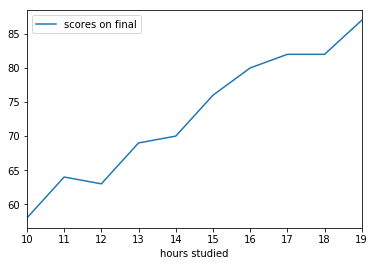

In [412]:
gpas.plot(x='hours studied', y='scores on final')

In [414]:
df_clean.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.4360,...,74.725000,74.87200,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
1,Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.4030,...,59.930000,60.48400,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
2,Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.1780,...,53.243000,54.31100,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
3,Albania,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,66.110000,66.304000,66.4870,...,75.912000,76.22100,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
5,Arab World,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,50.072947,50.634415,51.1821,...,69.942174,70.15756,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526


In [415]:
# for the life expectancy data, we'd like to plot year on the x axis, and life expectancy on the y axis
df_clean_reindex = df_clean.set_index('Country Name')
df_clean_reindex.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.4360,68.784000,...,74.725000,74.87200,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
Afghanistan,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.4030,36.900000,...,59.930000,60.48400,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
Angola,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.1780,40.546000,...,53.243000,54.31100,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
Albania,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,66.110000,66.304000,66.4870,66.689000,...,75.912000,76.22100,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
Arab World,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,50.072947,50.634415,51.1821,51.722024,...,69.942174,70.15756,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526


In [416]:
# swap rows and columns
df_transpose = df_clean_reindex.transpose()
df_transpose.index.name = 'year'
df_transpose.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,65.662,32.446,37.524,62.283,46.546909,51.537,65.055,65.972,61.968,70.817073,...,66.224854,59.039,48.975,52.579767,56.902,NaN,29.919,48.406,46.687,53.019
1961,66.074,32.962,37.811,63.301,47.141621,52.560,65.176,66.403,62.523,70.973171,...,66.487976,59.720,49.498,53.080934,57.188,NaN,30.163,48.777,47.084,53.483
1962,66.444,33.471,38.113,64.190,47.731783,53.573,65.269,66.838,63.049,70.942439,...,66.741098,60.387,50.031,53.498194,57.472,NaN,30.500,49.142,47.446,53.946
1963,66.787,33.971,38.430,64.914,48.320432,54.572,65.348,67.277,63.540,70.911707,...,66.996220,61.020,50.576,54.023398,57.756,NaN,30.943,49.509,47.772,54.403
1964,67.113,34.463,38.760,65.463,48.910019,55.555,65.426,67.716,63.992,70.880976,...,67.260366,61.581,51.131,54.693241,58.045,NaN,31.501,49.888,48.068,54.849


In [417]:
df_transpose_with_year = df_transpose.reset_index()
df_transpose_with_year.year = df_transpose_with_year.year.astype('int32')
df_transpose_with_year.columns.name = ''
df_transpose_with_year.head()

,year,Aruba,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1960,65.662,32.446,37.524,62.283,46.546909,51.537,65.055,65.972,61.968,...,66.224854,59.039,48.975,52.579767,56.902,NaN,29.919,48.406,46.687,53.019
1,1961,66.074,32.962,37.811,63.301,47.141621,52.560,65.176,66.403,62.523,...,66.487976,59.720,49.498,53.080934,57.188,NaN,30.163,48.777,47.084,53.483
2,1962,66.444,33.471,38.113,64.190,47.731783,53.573,65.269,66.838,63.049,...,66.741098,60.387,50.031,53.498194,57.472,NaN,30.500,49.142,47.446,53.946
3,1963,66.787,33.971,38.430,64.914,48.320432,54.572,65.348,67.277,63.540,...,66.996220,61.020,50.576,54.023398,57.756,NaN,30.943,49.509,47.772,54.403
4,1964,67.113,34.463,38.760,65.463,48.910019,55.555,65.426,67.716,63.992,...,67.260366,61.581,51.131,54.693241,58.045,NaN,31.501,49.888,48.068,54.849


Text(0, 0.5, 'life expectancy')

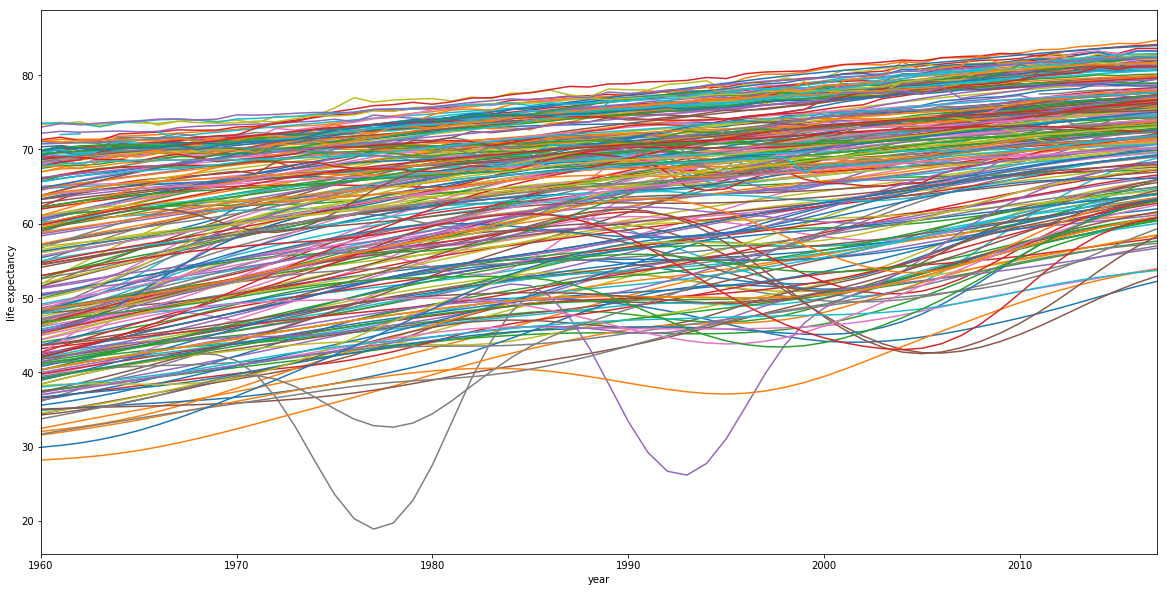

In [418]:
ax = df_transpose_with_year.plot(x='year', y=df_transpose_with_year.columns[1:], legend=False, figsize=(20, 10))
ax.set_ylabel('life expectancy')

In [419]:
df_transpose.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,65.662,32.446,37.524,62.283,46.546909,51.537,65.055,65.972,61.968,70.817073,...,66.224854,59.039,48.975,52.579767,56.902,NaN,29.919,48.406,46.687,53.019
1961,66.074,32.962,37.811,63.301,47.141621,52.560,65.176,66.403,62.523,70.973171,...,66.487976,59.720,49.498,53.080934,57.188,NaN,30.163,48.777,47.084,53.483
1962,66.444,33.471,38.113,64.190,47.731783,53.573,65.269,66.838,63.049,70.942439,...,66.741098,60.387,50.031,53.498194,57.472,NaN,30.500,49.142,47.446,53.946
1963,66.787,33.971,38.430,64.914,48.320432,54.572,65.348,67.277,63.540,70.911707,...,66.996220,61.020,50.576,54.023398,57.756,NaN,30.943,49.509,47.772,54.403
1964,67.113,34.463,38.760,65.463,48.910019,55.555,65.426,67.716,63.992,70.880976,...,67.260366,61.581,51.131,54.693241,58.045,NaN,31.501,49.888,48.068,54.849


In [420]:
#@title
# lets take a look at the countries with lowest life expectancies each year
lowest_life_expectancies = pd.DataFrame({
    'year': df_transpose.index.values,
    'life expectancy': df_transpose.min(axis=1).values,
    'country name': df_transpose.idxmin(axis=1)})
lowest_life_expectancies.reset_index(drop=True, inplace=True)
lowest_life_expectancies.head(n=10)

,year,life expectancy,country name
0,1960,28.199,Mali
1,1961,28.345,Mali
2,1962,28.535,Mali
3,1963,28.782,Mali
4,1964,29.097,Mali
5,1965,29.489,Mali
6,1966,29.959,Mali
7,1967,30.496,Mali
8,1968,31.086,Mali
9,1969,31.720,Mali


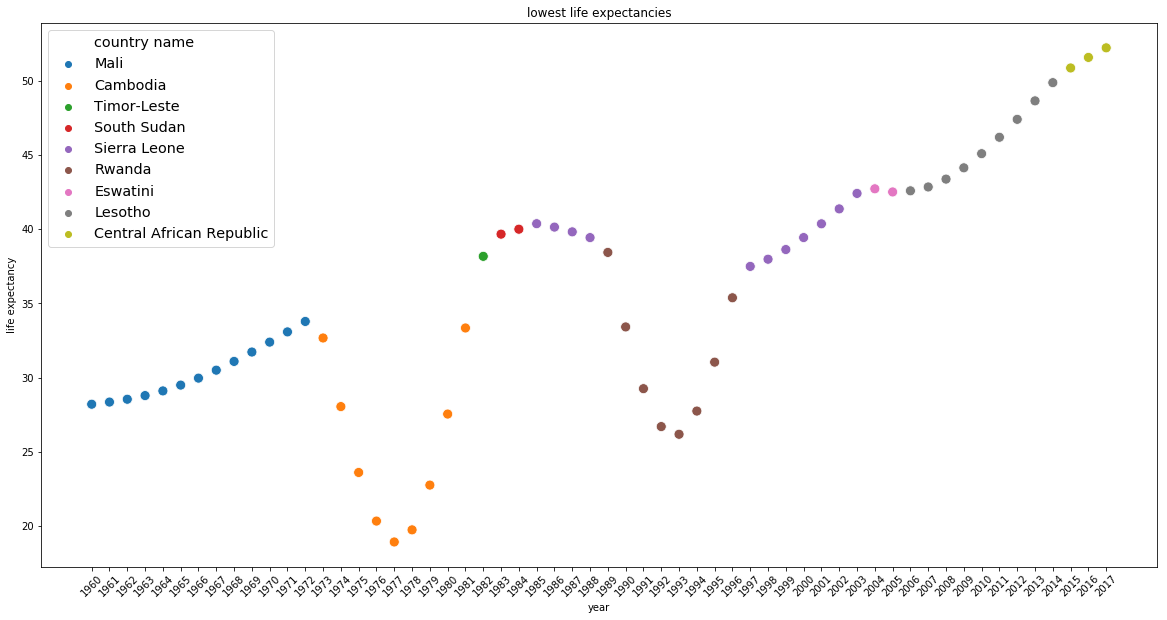

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=lowest_life_expectancies, x='year', y='life expectancy', hue='country name', s=100, ax=ax)
plt.legend(fontsize='x-large', title_fontsize='40')
ax.set_title('lowest life expectancies')
_ = plt.xticks(rotation=45)

Text(1986, 64, 'Eswatini and Lesotho: very correlated\nWhat may be the reason?')

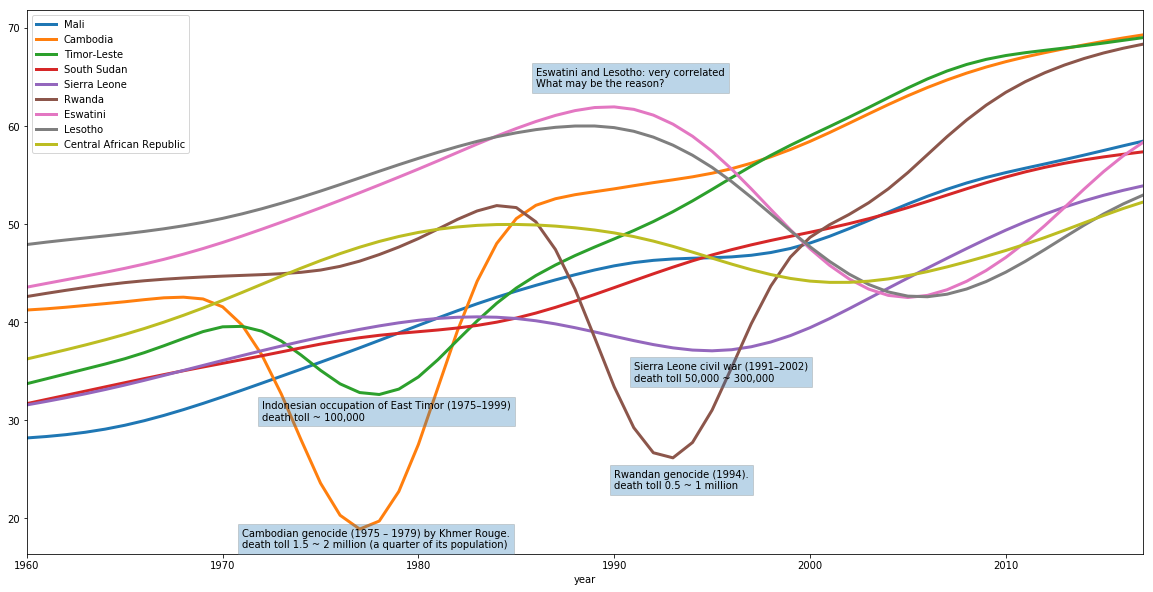

In [422]:
from collections import OrderedDict
low_countries = OrderedDict((country, None) for country in lowest_life_expectancies['country name'])
df_low_countries = df_transpose_with_year.loc[:, ['year'] + [country for country in low_countries.keys()]]
# for the countries that are idenfied as having extraordinarily low expectancies in some years, plot there life expectancies across years
_ = df_low_countries.plot(x='year', y=df_low_countries.columns[1:], lw=3, figsize=(20, 10))
# relevant events in the plot
cambodia_genocide = 'Cambodian genocide (1975 – 1979) by Khmer Rouge.\n death toll 1.5 ~ 2 million (a quarter of its population)'
plt.text(1971, 17, cambodia_genocide, wrap=True, bbox=dict(edgecolor='grey', alpha=0.3))
rwandan_genocide = 'Rwandan genocide (1994).\n death toll 0.5 ~ 1 million'
plt.text(1990, 23, rwandan_genocide, wrap=True, bbox=dict(edgecolor='grey', alpha=0.3))
timor_leste_invasion = 'Indonesian occupation of East Timor (1975–1999)\n death toll ~ 100,000'
plt.text(1972, 30, timor_leste_invasion, wrap=True, bbox=dict(edgecolor='grey', alpha=0.3))
sierra_leone_civil_war = ' Sierra Leone civil war (1991–2002)\n death toll 50,000 ~ 300,000'
plt.text(1991, 34, sierra_leone_civil_war, wrap=True, bbox=dict(edgecolor='grey', alpha=0.3))
eswatini_lesotho = 'Eswatini and Lesotho: very correlated\nWhat may be the reason?'
plt.text(1986, 64, eswatini_lesotho, wrap=True, bbox=dict(edgecolor='grey', alpha=0.3))

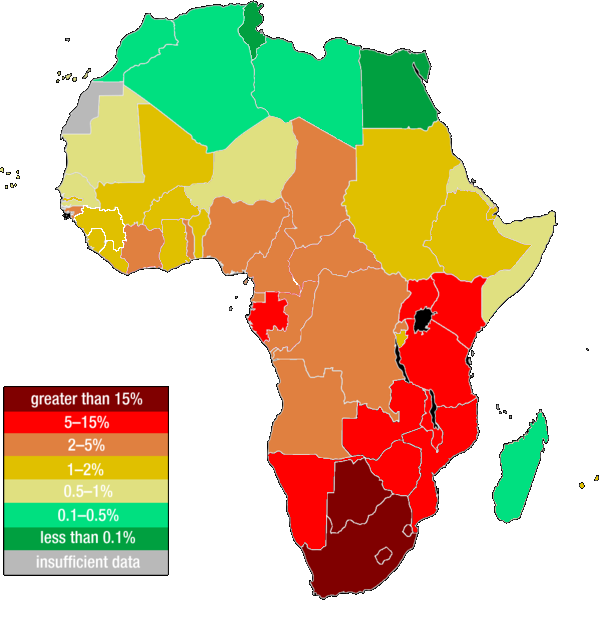

In [423]:
import requests
from IPython.display import Image
import IPython.display as Disp
url = 'https://upload.wikimedia.org/wikipedia/commons/5/56/Map-of-HIV-Prevalance-in-Africa.png'
Disp.Image(requests.get(url).content)

In [443]:
# read hiv prevalence data
hiv_url = 'https://drive.google.com/uc?export=download&id=1sRgIGVFOL563GYZ4g2lr7QN23uOToUM8'
df_hiv = pd.read_csv(hiv_url)
# rename the columns
df_hiv=df_hiv.rename(columns = {'Prevalence - HIV/AIDS - Sex: Both - Age: 15-49 years (Percent) (%)':'hiv_prevalence',
                                'Entity': 'Country Name', 'Code': 'Country Code'})
# some rows have no country code: for example Country Name = "Central Europe, Eastern Europe, and Central Asia", which is not a country
df_hiv = df_hiv.dropna(subset=['Country Code'], how='any')
# once the NAN country code rows are dropped, this dataset has no more NAN values
df_hiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5488 entries, 0 to 6467
Data columns (total 4 columns):
Country Name      5488 non-null object
Country Code      5488 non-null object
Year              5488 non-null int64
hiv_prevalence    5488 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 214.4+ KB


In [425]:
df_hiv.head()

,Country Name,Country Code,Year,hiv_prevalence
0,Afghanistan,AFG,1990,0.006520
1,Afghanistan,AFG,1991,0.006862
2,Afghanistan,AFG,1992,0.007170
3,Afghanistan,AFG,1993,0.007592
4,Afghanistan,AFG,1994,0.008080


In [426]:
df_hiv.tail()

,Country Name,Country Code,Year,hiv_prevalence
6463,Zimbabwe,ZWE,2013,14.236531
6464,Zimbabwe,ZWE,2014,13.934145
6465,Zimbabwe,ZWE,2015,13.734542
6466,Zimbabwe,ZWE,2016,13.641073
6467,Zimbabwe,ZWE,2017,13.657982


In [427]:
df_le = pd.read_csv(life_expectancy_url, header=2, skip_blank_lines=True, sep=',', quotechar='"')
df_le = df_le.dropna(axis=1, how='all')
df_le = df_le.dropna(axis=0, thresh=5)
df_le.drop(columns=['Indicator Name', 'Indicator Code'], inplace=True)
df_le.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,...,74.725000,74.87200,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
1,Afghanistan,AFG,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,...,59.930000,60.48400,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
2,Angola,AGO,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,...,53.243000,54.31100,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
3,Albania,ALB,62.283000,63.301000,64.190000,64.914000,65.463000,65.850000,66.110000,66.304000,...,75.912000,76.22100,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
5,Arab World,ARB,46.546909,47.141621,47.731783,48.320432,48.910019,49.496478,50.072947,50.634415,...,69.942174,70.15756,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526


In [ ]:
# now we have df_hiv and df_le. what are some possible issues when using the two data frames?
# (1) Country Aruba: in life expectancy dataset, not in hiv dataset
# (2) Spelling differences: e.g. Congo, Dem. Rep. (life expectancy dataset) vs Democratic Republic of Congo (hiv dataset)
# (3) life expectancy dataset ranges from 1960 to 2017, while hiv dataset ranges from 1990 to 2017
# (4) data format: hiv dataset has one year per country per row, life expectancy dataset has multiple year per country per row

In [ ]:
# solutions:
# identify each country with 'Country Code', which is unique ("COD" for both Congo, Dem. Rep. and Democratic Republic of Congo). only use country code
# present in both datasets
# reorganize the hiv dataset so it becomes multiple year per country per row
# remove 1960 - 1989 life expectancies

In [428]:
# set row index to Country code in life expectancy table. remove years 1960 - 1989
df_le.set_index('Country Code', inplace=True)
df_le.drop(columns=[str(year) for year in range(1960, 1990)], inplace=True)
df_le.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,73.468000,73.509000,73.544000,73.573000,73.598000,73.6220,73.646000,73.671000,73.700000,...,74.725000,74.87200,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000
AFG,Afghanistan,50.331000,50.999000,51.641000,52.256000,52.842000,53.3980,53.924000,54.424000,54.906000,...,59.930000,60.48400,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000
AGO,Angola,45.306000,45.271000,45.230000,45.201000,45.201000,45.2460,45.350000,45.519000,45.763000,...,53.243000,54.31100,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000
ALB,Albania,71.836000,71.803000,71.802000,71.860000,71.992000,72.2050,72.495000,72.838000,73.208000,...,75.912000,76.22100,76.562000,76.914000,77.252000,77.554000,77.813000,78.025000,78.194000,78.333000
ARB,Arab World,64.351577,64.736341,65.043852,65.414907,65.785653,66.1961,66.554103,66.897145,67.218091,...,69.942174,70.15756,70.349916,70.528775,70.703827,70.882254,71.064292,71.249571,71.436497,71.622526


In [429]:
# reformat hiv datasets, and set its row index to Country Code
df_hiv_pivot = df_hiv.pivot(columns='Year', values='hiv_prevalence', index='Country Code')
df_hiv_pivot = df_hiv_pivot.add_prefix('hiv_')
df_hiv_pivot.head()

Year,hiv_1990,hiv_1991,hiv_1992,hiv_1993,hiv_1994,hiv_1995,hiv_1996,hiv_1997,hiv_1998,hiv_1999,...,hiv_2008,hiv_2009,hiv_2010,hiv_2011,hiv_2012,hiv_2013,hiv_2014,hiv_2015,hiv_2016,hiv_2017
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,0.006520,0.006862,0.007170,0.007592,0.008080,0.008538,0.008983,0.009436,0.009885,0.010320,...,0.013624,0.013919,0.014253,0.014867,0.015981,0.017521,0.019403,0.021553,0.023911,0.026428
AGO,0.072582,0.105594,0.149013,0.200793,0.258954,0.321073,0.401570,0.507966,0.628401,0.750492,...,1.716807,1.793920,1.845849,1.877284,1.901067,1.916575,1.923315,1.920597,1.906919,1.880777
ALB,0.000867,0.000949,0.001022,0.001083,0.001130,0.001160,0.001178,0.001190,0.001203,0.001213,...,0.001300,0.001294,0.001295,0.001311,0.001343,0.001389,0.001448,0.001517,0.001593,0.001675
AND,0.094683,0.099473,0.102744,0.106486,0.106964,0.106187,0.105793,0.105373,0.105319,0.105829,...,0.106337,0.106605,0.107094,0.106108,0.107224,0.108643,0.110264,0.112191,0.114269,0.116842
ARE,0.004153,0.004534,0.005002,0.005534,0.006107,0.006692,0.007405,0.008319,0.009342,0.010370,...,0.017733,0.018353,0.018840,0.019294,0.019792,0.020342,0.020941,0.021590,0.022262,0.022941


In [430]:
# now join the two datasets. the joint dataset has one country per row, each row has life expectancies from 1990 - 2017, and hiv prevalence from 1990 - 2017
df_le_hiv = df_le.join(df_hiv_pivot, how='inner')
df_le_hiv.head()

,Country Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,hiv_2008,hiv_2009,hiv_2010,hiv_2011,hiv_2012,hiv_2013,hiv_2014,hiv_2015,hiv_2016,hiv_2017
Country Code,,,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,50.331,50.999,51.641,52.256,52.842,53.398,53.924,54.424,54.906,...,0.013624,0.013919,0.014253,0.014867,0.015981,0.017521,0.019403,0.021553,0.023911,0.026428
AGO,Angola,45.306,45.271,45.230,45.201,45.201,45.246,45.350,45.519,45.763,...,1.716807,1.793920,1.845849,1.877284,1.901067,1.916575,1.923315,1.920597,1.906919,1.880777
ALB,Albania,71.836,71.803,71.802,71.860,71.992,72.205,72.495,72.838,73.208,...,0.001300,0.001294,0.001295,0.001311,0.001343,0.001389,0.001448,0.001517,0.001593,0.001675
ARE,United Arab Emirates,71.939,72.208,72.466,72.715,72.957,73.194,73.428,73.657,73.883,...,0.017733,0.018353,0.018840,0.019294,0.019792,0.020342,0.020941,0.021590,0.022262,0.022941
ARG,Argentina,71.594,71.813,72.032,72.246,72.453,72.651,72.843,73.029,73.213,...,0.639709,0.651640,0.661631,0.670901,0.680486,0.689622,0.697730,0.705327,0.712792,0.719359


In [431]:
# now country code is no longer needed. the two datasets are now consistent, so we can set row index to country name, which is more readable
df_le_hiv.set_index('Country Name', inplace=True)
df_le_hiv.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,hiv_2008,hiv_2009,hiv_2010,hiv_2011,hiv_2012,hiv_2013,hiv_2014,hiv_2015,hiv_2016,hiv_2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,50.331,50.999,51.641,52.256,52.842,53.398,53.924,54.424,54.906,55.376,...,0.013624,0.013919,0.014253,0.014867,0.015981,0.017521,0.019403,0.021553,0.023911,0.026428
Angola,45.306,45.271,45.230,45.201,45.201,45.246,45.350,45.519,45.763,46.093,...,1.716807,1.793920,1.845849,1.877284,1.901067,1.916575,1.923315,1.920597,1.906919,1.880777
Albania,71.836,71.803,71.802,71.860,71.992,72.205,72.495,72.838,73.208,73.587,...,0.001300,0.001294,0.001295,0.001311,0.001343,0.001389,0.001448,0.001517,0.001593,0.001675
United Arab Emirates,71.939,72.208,72.466,72.715,72.957,73.194,73.428,73.657,73.883,74.106,...,0.017733,0.018353,0.018840,0.019294,0.019792,0.020342,0.020941,0.021590,0.022262,0.022941
Argentina,71.594,71.813,72.032,72.246,72.453,72.651,72.843,73.029,73.213,73.396,...,0.639709,0.651640,0.661631,0.670901,0.680486,0.689622,0.697730,0.705327,0.712792,0.719359


In [432]:
df_le_hiv.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', 'hiv_1990', 'hiv_1991', 'hiv_1992', 'hiv_1993', 'hiv_1994',
       'hiv_1995', 'hiv_1996', 'hiv_1997', 'hiv_1998', 'hiv_1999', 'hiv_2000',
       'hiv_2001', 'hiv_2002', 'hiv_2003', 'hiv_2004', 'hiv_2005', 'hiv_2006',
       'hiv_2007', 'hiv_2008', 'hiv_2009', 'hiv_2010', 'hiv_2011', 'hiv_2012',
       'hiv_2013', 'hiv_2014', 'hiv_2015', 'hiv_2016', 'hiv_2017'],
      dtype='object')

In [433]:
df_le_clean = df_le_hiv.iloc[:, 0: 28]
df_hiv_clean = df_le_hiv.iloc[:, 28:]
df_hiv_clean.columns = df_hiv_clean.columns.str.lstrip('hiv_')

In [434]:
df_le_clean.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,50.331,50.999,51.641,52.256,52.842,53.398,53.924,54.424,54.906,55.376,...,59.930,60.484,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130
Angola,45.306,45.271,45.230,45.201,45.201,45.246,45.350,45.519,45.763,46.093,...,53.243,54.311,55.350,56.330,57.236,58.054,58.776,59.398,59.925,60.379
Albania,71.836,71.803,71.802,71.860,71.992,72.205,72.495,72.838,73.208,73.587,...,75.912,76.221,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333
United Arab Emirates,71.939,72.208,72.466,72.715,72.957,73.194,73.428,73.657,73.883,74.106,...,75.957,76.145,76.332,76.521,76.711,76.903,77.095,77.285,77.470,77.647
Argentina,71.594,71.813,72.032,72.246,72.453,72.651,72.843,73.029,73.213,73.396,...,74.952,75.116,75.278,75.439,75.598,75.756,75.913,76.068,76.221,76.372


In [435]:
df_hiv_clean.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.006520,0.006862,0.007170,0.007592,0.008080,0.008538,0.008983,0.009436,0.009885,0.010320,...,0.013624,0.013919,0.014253,0.014867,0.015981,0.017521,0.019403,0.021553,0.023911,0.026428
Angola,0.072582,0.105594,0.149013,0.200793,0.258954,0.321073,0.401570,0.507966,0.628401,0.750492,...,1.716807,1.793920,1.845849,1.877284,1.901067,1.916575,1.923315,1.920597,1.906919,1.880777
Albania,0.000867,0.000949,0.001022,0.001083,0.001130,0.001160,0.001178,0.001190,0.001203,0.001213,...,0.001300,0.001294,0.001295,0.001311,0.001343,0.001389,0.001448,0.001517,0.001593,0.001675
United Arab Emirates,0.004153,0.004534,0.005002,0.005534,0.006107,0.006692,0.007405,0.008319,0.009342,0.010370,...,0.017733,0.018353,0.018840,0.019294,0.019792,0.020342,0.020941,0.021590,0.022262,0.022941
Argentina,0.236169,0.275436,0.310808,0.341723,0.368429,0.390079,0.411484,0.436852,0.463301,0.488765,...,0.639709,0.651640,0.661631,0.670901,0.680486,0.689622,0.697730,0.705327,0.712792,0.719359


In [436]:
# transpose life expectancy dataset
df_le_clean_transpose = df_le_clean.transpose()
df_le_clean_transpose.index.name = 'year'
df_le_clean_transpose.reset_index(inplace=True)
df_le_clean_transpose.year = df_hiv_clean_transpose.year.astype('int32')
# transpose hiv dataset
df_hiv_clean_transpose = df_hiv_clean.transpose()
df_hiv_clean_transpose.index.name = 'year'
df_hiv_clean_transpose.reset_index(inplace=True)
df_hiv_clean_transpose.year = df_hiv_clean_transpose.year.astype('int32')
df_hiv_clean_transpose.head()

Country Name,year,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,St. Vincent and the Grenadines,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,1990,0.006520,0.072582,0.000867,0.004153,0.236169,0.000801,0.177955,0.095450,0.063582,...,0.280876,0.046061,0.192408,0.050508,0.041480,0.037539,0.013836,0.237522,9.732746,14.124973
1,1991,0.006862,0.105594,0.000949,0.004534,0.275436,0.000831,0.197910,0.095490,0.079211,...,0.349984,0.070044,0.212442,0.059012,0.044529,0.041287,0.014408,0.656599,11.177770,16.252034
2,1992,0.007170,0.149013,0.001022,0.005002,0.310808,0.000890,0.215647,0.094519,0.091798,...,0.413104,0.093033,0.229910,0.070395,0.047223,0.044634,0.014944,1.273503,12.472435,18.140969
3,1993,0.007592,0.200793,0.001083,0.005534,0.341723,0.000975,0.230441,0.092947,0.101230,...,0.466626,0.114415,0.244215,0.084003,0.049388,0.047473,0.015437,2.047636,13.560770,19.701655
4,1994,0.008080,0.258954,0.001130,0.006107,0.368429,0.001077,0.241590,0.090999,0.107411,...,0.507275,0.133661,0.254806,0.099172,0.050965,0.049684,0.015883,2.937283,14.384250,20.848724


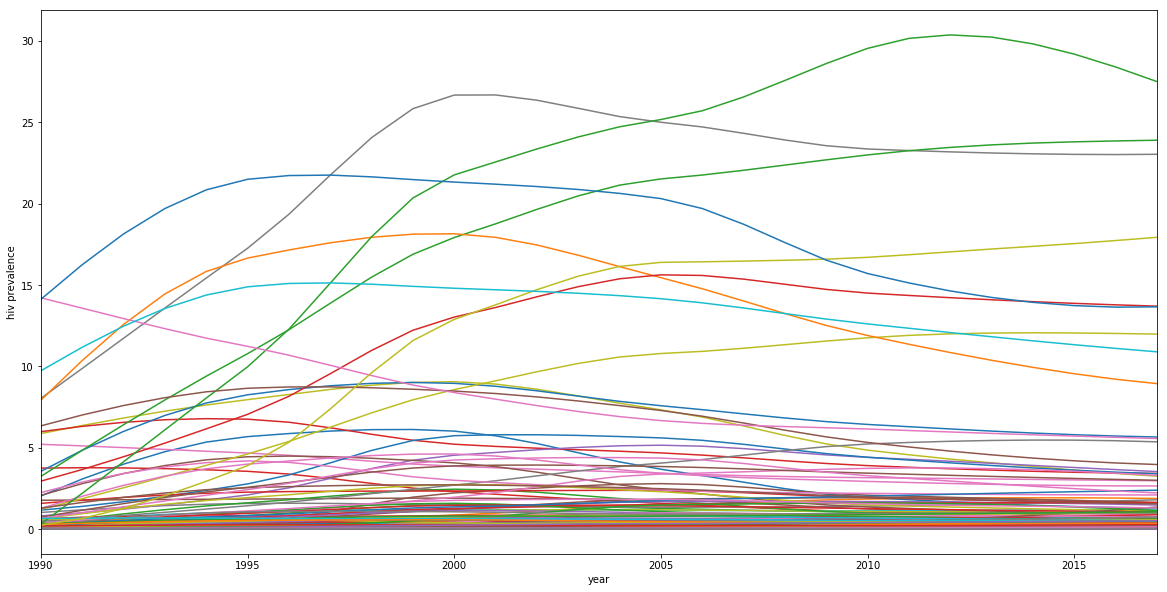

In [437]:
ax = df_hiv_clean_transpose.plot(x='year', y=df_hiv_clean_transpose.columns[1:], legend=False, figsize=(20, 10))
_ = ax.set_ylabel('hiv prevalence')

In [438]:
# top 20 high hiv prevalence countries in 2017
hiv_rank_2017 = df_hiv_clean['2017'].argsort()
high_hiv_countries = df_hiv_clean.index.values[hiv_rank_2017][-1:-21:-1]
high_hiv_countries

array(['Eswatini', 'Lesotho', 'Botswana', 'South Africa', 'Namibia',
       'Zimbabwe', 'Mozambique', 'Zambia', 'Malawi', 'Kenya', 'Uganda',
       'Equatorial Guinea', 'Tanzania', 'Cameroon', "Cote d'Ivoire",
       'Gabon', 'Guinea-Bissau', 'Central African Republic', 'Nigeria',
       'Congo, Rep.'], dtype=object)

Text(1997, 67, 'global average')

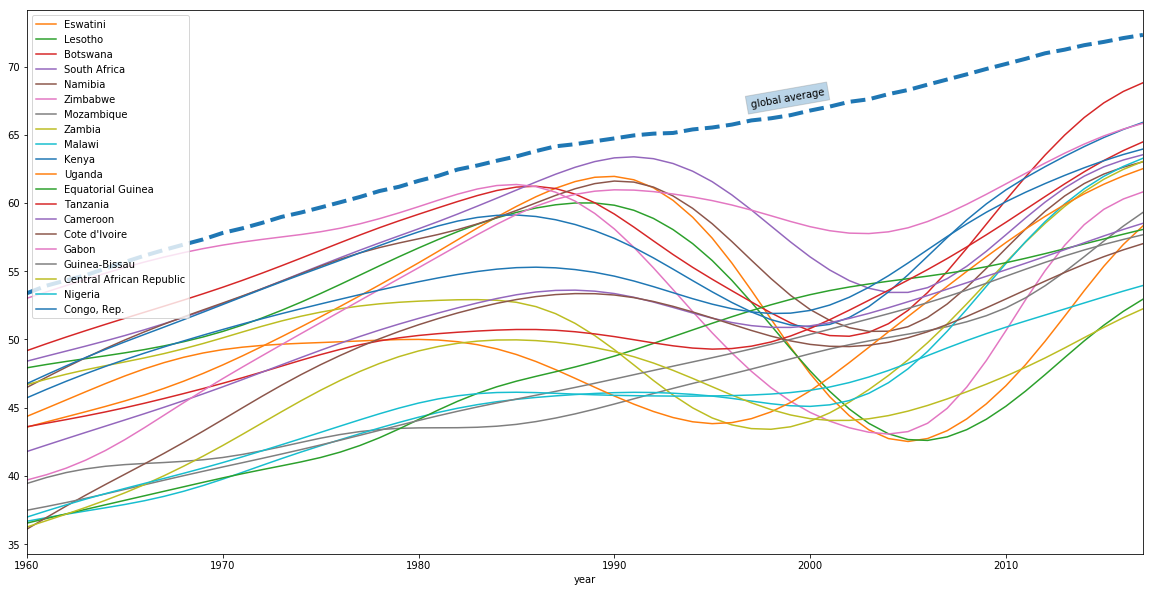

In [439]:
fig, ax = plt.subplots(figsize=(20, 10))
# the global average life expectancies from 1960 to 2017
global_average_le = df_transpose.mean(axis=1)
ax.plot(df_transpose_with_year.year, global_average_le.values, lw=4, linestyle='--', label='global average')
# life expectancies from 1960 to 2017 in high hiv prevalance countries
df_transpose_with_year.plot(x='year', y=high_hiv_countries, ax=ax)
plt.text(1997, 67, 'global average', wrap=True, bbox=dict(edgecolor='grey', alpha=0.3), rotation=10)

Text(0, 0.5, 'life expectancy in 2000')

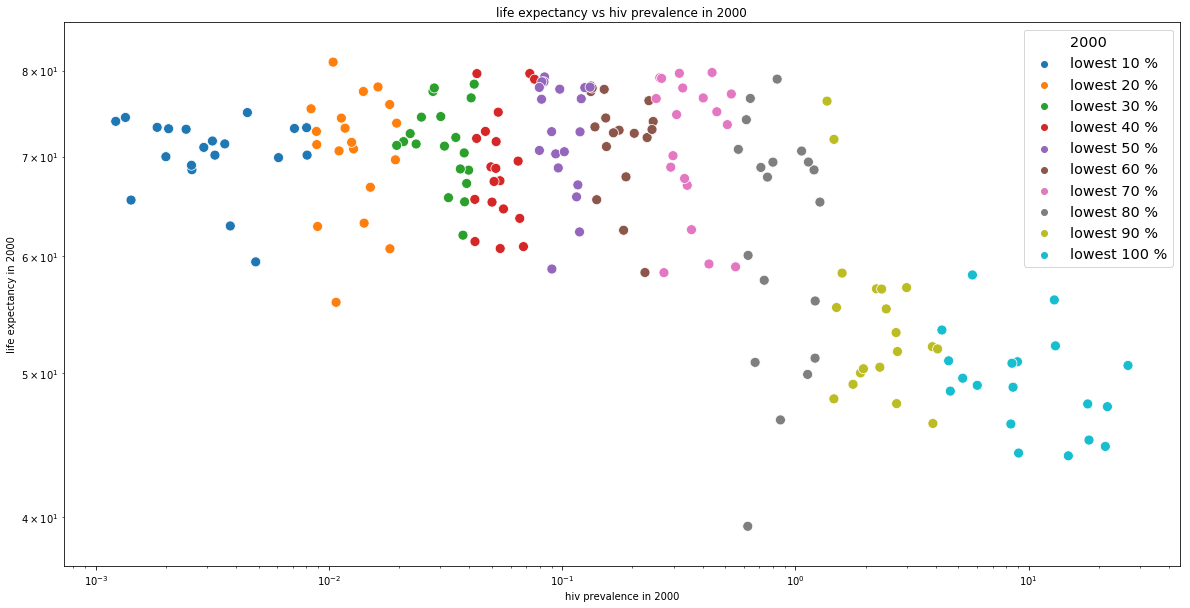

In [440]:
year = '2000'
hue = pd.qcut(df_hiv_clean[year], 10, labels=['lowest {} %'.format(q) for q in range(10, 110, 10)])
fig, ax = plt.subplots(figsize=(20, 10))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x=df_hiv_clean[year], y=df_le_clean[year], s=100, hue=hue, ax=ax)
plt.legend(fontsize='x-large', title_fontsize='40')
ax.set_title('life expectancy vs hiv prevalence in {}'.format(year))
ax.set_xlabel('hiv prevalence in {}'.format(year))
ax.set_ylabel('life expectancy in {}'.format(year))

In [441]:
highest_life_expectancies = pd.DataFrame({
    'year': df_transpose.index.values,
    'life expectancy': df_transpose.max(axis=1).values,
    'country name': df_transpose.idxmax(axis=1)})
highest_life_expectancies.reset_index(drop=True, inplace=True)
highest_life_expectancies.head(n=10)

,year,life expectancy,country name
0,1960,73.549756,Norway
1,1961,73.652683,Netherlands
2,1962,73.721951,Iceland
3,1963,73.555366,Sweden
4,1964,73.733171,Sweden
5,1965,73.868780,Iceland
6,1966,74.078537,Sweden
7,1967,74.122439,Sweden
8,1968,74.005854,Iceland
9,1969,74.084878,Sweden


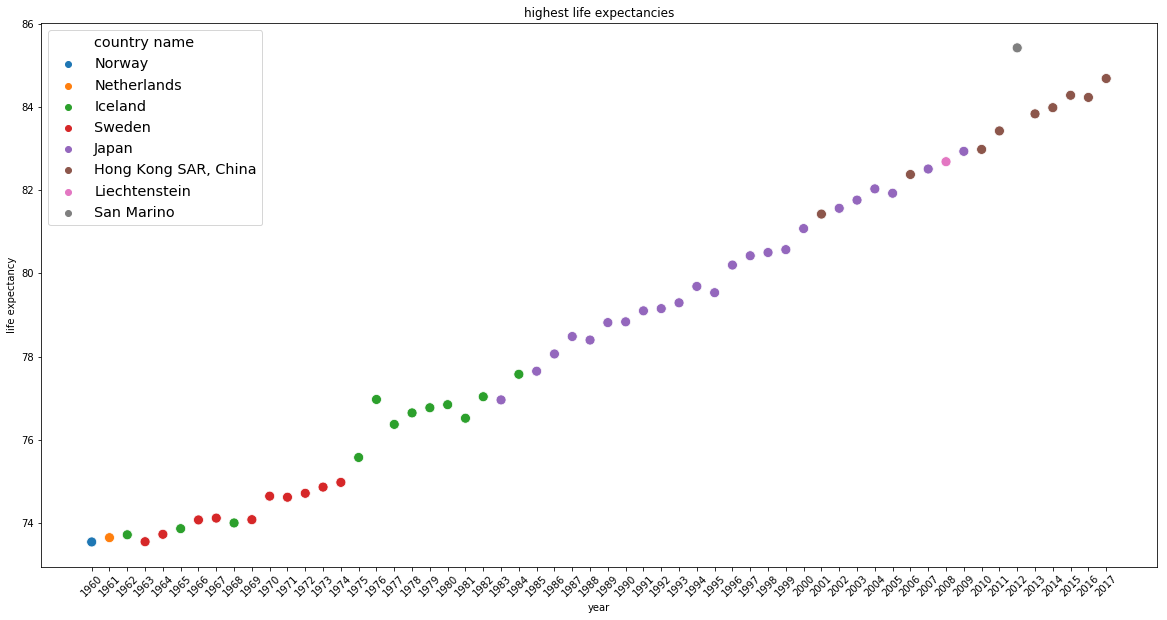

In [442]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=highest_life_expectancies, x='year', y='life expectancy', hue='country name', s=100, ax=ax)
plt.legend(fontsize='x-large', title_fontsize='40')
ax.set_title('highest life expectancies')
_ = plt.xticks(rotation=45)